# Time series transformers

`tslearn` provides a `piecewise` package that contains Piecewise Aggregate Approximation (PAA) and Symbolic Aggregate approXimation (SAX).

Populating the interactive namespace from numpy and matplotlib


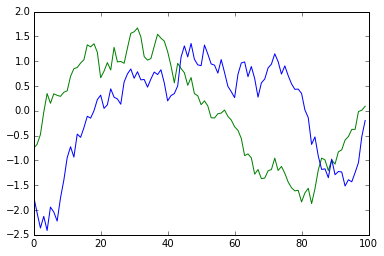

In [1]:
%pylab inline

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation

numpy.random.seed(0)
n_ts, sz, d = 2, 100, 1
dataset = random_walks(n_ts=n_ts, sz=sz, d=d)
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset_scaled = scaler.fit_transform(dataset)

pylab.plot(numpy.arange(sz), dataset[0, :, 0], "g-")
pylab.plot(numpy.arange(sz), dataset[1, :, 0], "b-");

## Piecewise Aggregate Approximation (PAA)

Let us first visualize how PAA transforms our time series:

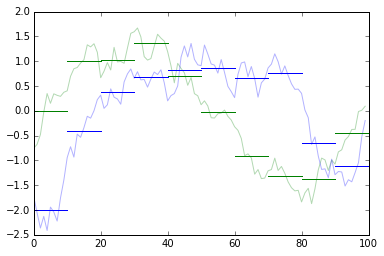

In [2]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset = paa.fit_transform(dataset)

pylab.plot(numpy.arange(sz), dataset[0, :, 0], "g-", alpha=0.3)
pylab.plot(numpy.arange(sz), dataset[1, :, 0], "b-", alpha=0.3)
sz_segment = sz // n_paa_segments
for i_seg in range(n_paa_segments):
    start = i_seg * sz_segment
    end = start + sz_segment
    pylab.plot([start, end], [paa_dataset[0, i_seg, 0]] * 2, "g-")
    pylab.plot([start, end], [paa_dataset[1, i_seg, 0]] * 2, "b-")

We can now compute PAA distance by two means:

In [3]:
print(paa.distance_paa(paa_dataset[0], paa_dataset[1]))
print(paa.distance(dataset[0], dataset[1]))

12.4339582447
12.4339582447


In practice, if you already have your PAA transformed time series, you should use `distance_paa` for the sake of efficiency, otherwise, `distance` can compute the same quantity starting from raw time series. Finally, we can check that these quantities lower bound the Euclidean Distance:

In [4]:
print(numpy.linalg.norm(dataset[0] - dataset[1]))

13.1181159018


## Symbolic Aggregate approXimation (SAX)

Let us now turn our focus on SAX transformation for time series:

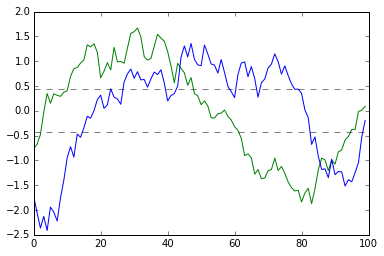

In [5]:
n_sax_symbols = 3
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size=n_sax_symbols)
sax_dataset = sax.fit_transform(dataset)

pylab.plot(numpy.arange(sz), dataset[0, :, 0], "g-")
pylab.plot(numpy.arange(sz), dataset[1, :, 0], "b-")
for bp in sax.breakpoints_:
    pylab.axhline(y=bp, linestyle="dashed", color="k", alpha=0.5)

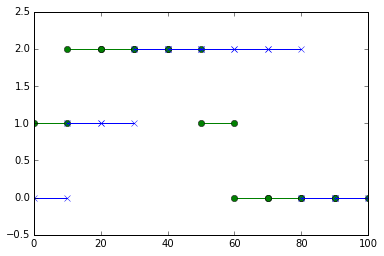

In [6]:
for i_seg in range(n_paa_segments):
    start = i_seg * sz_segment
    end = start + sz_segment
    pylab.plot([start, end], [sax_dataset[0, i_seg, 0]] * 2, "g-o")
    pylab.plot([start, end], [sax_dataset[1, i_seg, 0]] * 2, "b-x")
pylab.ylim([-.5, n_sax_symbols - .5]);

Finally, just as with PAA, we can compute SAX distance in two ways (and observe that it lower bounds the PAA distance):

In [7]:
print(sax.distance_sax(sax_dataset[0], sax_dataset[1]))
print(sax.distance(dataset[0], dataset[1]))

3.85254208396
3.85254208396
